# Inversion and Optimisation  <a class="tocSkip"></a>

## Lecture 2a: Singular Value Decomposition and the Generalized Inverse <a class="tocSkip"></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Matrix-Diagonalisation-and-Eigenvalue-Decomposition" data-toc-modified-id="Matrix-Diagonalisation-and-Eigenvalue-Decomposition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matrix Diagonalisation and Eigenvalue Decomposition</a></span><ul class="toc-item"><li><span><a href="#Summary-of-important-matrix-eigenvalue-decomposition-properties" data-toc-modified-id="Summary-of-important-matrix-eigenvalue-decomposition-properties-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Summary of important matrix eigenvalue decomposition properties</a></span></li><li><span><a href="#An-example-(from-Computational-Mathematics)" data-toc-modified-id="An-example-(from-Computational-Mathematics)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>An example (from Computational Mathematics)</a></span></li><li><span><a href="#A-Geometrical-Interpretation-(from-Computational-Mathematics)" data-toc-modified-id="A-Geometrical-Interpretation-(from-Computational-Mathematics)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>A Geometrical Interpretation (from Computational Mathematics)</a></span></li></ul></li><li><span><a href="#Singular-Value-Decomposition-(SVD)" data-toc-modified-id="Singular-Value-Decomposition-(SVD)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Singular Value Decomposition (SVD)</a></span><ul class="toc-item"><li><span><a href="#Some-SVD-properties" data-toc-modified-id="Some-SVD-properties-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Some SVD properties</a></span></li><li><span><a href="#Geometric-interpretation" data-toc-modified-id="Geometric-interpretation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Geometric interpretation</a></span></li><li><span><a href="#The-compact-form-of-SVD" data-toc-modified-id="The-compact-form-of-SVD-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>The compact form of SVD</a></span></li><li><span><a href="#Aside:-some-of-the-various-uses-of-the-SVD" data-toc-modified-id="Aside:-some-of-the-various-uses-of-the-SVD-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Aside: some of the various uses of the SVD</a></span></li></ul></li><li><span><a href="#The-generalised-(or-pseudo)-Moore-Penrose-inverse" data-toc-modified-id="The-generalised-(or-pseudo)-Moore-Penrose-inverse-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The generalised (or pseudo) Moore-Penrose inverse</a></span><ul class="toc-item"><li><span><a href="#Definition" data-toc-modified-id="Definition-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Definition</a></span></li><li><span><a href="#Properties" data-toc-modified-id="Properties-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Properties</a></span></li><li><span><a href="#Practical-Issues:" data-toc-modified-id="Practical-Issues:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Practical Issues:</a></span></li></ul></li><li><span><a href="#Regularisation" data-toc-modified-id="Regularisation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regularisation</a></span><ul class="toc-item"><li><span><a href="#Damped-least-squares" data-toc-modified-id="Damped-least-squares-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Damped least squares</a></span></li><li><span><a href="#More-general-regularisation" data-toc-modified-id="More-general-regularisation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>More general regularisation</a></span></li></ul></li><li><span><a href="#List-of-Definitions" data-toc-modified-id="List-of-Definitions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>List of Definitions</a></span></li></ul></div>

## Summary <a class="tocSkip"></a>
In this first part of today's lecture we will finish the story of solving non-square linear systems (or in fact square, singular systems) by talking about the solution of mixed-determined systems for which neither the least-squares solution nor the minimum-norm solution approaches work. To construct a generalized inverse that does provide a sensible answer, we need the Singular Value Decomposition (SVD) which also has a lot of other applications. The SVD is in some sense a generalisation of the eigendecomposition of a matrix, and therefore we will briefly revise that topic first. As an alternative to the generalized inverse, we will discuss the topic of regularisation.
    
### Important concepts: <a class="tocSkip"></a>
- main properties of eigenvalues decompositions, in particular for symmetric real matrices (real eigenvalues and orthogonal/orthonormal basis of eigenvectors)
- the Singular Value Decomposition
- the generalized inverse (or pseudo inverse, or Moore-Penrose inverse)
- the problem of ill-conditioning, noise, and the role of regularisation in inverse problems

In [1]:
%%html
<style>
a.definition {
    color: blue;
    font-style: italic;
    font-weight: bold;
}
</style>

In [2]:
%matplotlib inline
%precision 6
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl

# Matrix Diagonalisation and Eigenvalue Decomposition
## (see Computational Mathematics for more details) <a class="tocSkip"></a>

The SVD can be seen as a generalisation of the eigenvalue decomposition, which has similarities to the results obtained for symmetric matrices, but that is applicable to all matrices of any shape.

Here we first summarize the main properties of eigenvalue decompositions, as you will have seen in Computional Mathematics, followed by a section 

## Summary of important matrix eigenvalue decomposition properties

Recall that

1. The eigenvalues of a matrix $A$ can be obtained from the roots of the characteristic polynomial

$$\det (\underline{\mathbf A}-\lambda \underline{\mathbf I}) = 0.$$

For an $n\times n$ matrix, this gives at most $n$ distinct eigenvalues. In some cases we get repeated values. As an example, in

$$(\lambda-3)^2 (\lambda+1) = 0$$

we have a repeated eigenvalue $\lambda=3$ with algebraic multipilicty 2, and $\lambda=-1$ is distinct.

2. The eigenvalues of **symmetric real matrices** are always **real**.

3. Eigenvectors corresponding to distinct eigenvalues are always **linearly independent**. (For repeated eigenvalues (i.e. algebraic multiplicity greater than 1) we *may be able*, but not always [\*](#footnote1), to find the corresponding number of linearly independent eigenvectors).

4. The **eigenvectors of a symmetric real matrix**, corresponding to *distinct* eigenvalues, are mutually **orthogonal**.
    
5. For eigenvalues of a symmetric real matrix that are repeated, we can always find the corresponding number (same as the multiplicity) of linearly independent vectors, which therefore spans a subspace of the same dimension. By choosing an orthonormal basis, we can ensure they are orthonormal as well (and by the previous point orthogonal to all eigenvectors associated with different eigenvalues).

6. A consequence of this is that for a **symmetric real matrix** we **can always choose an orthonormal basis of eigenvectors**.

<span id="footnote1">*: For a counter example, consider $\underline{\mathbf A}=\begin{pmatrix} 0 & 1 \\ 0 & 0\end{pmatrix}$; Its only eigenvalue is $\lambda=0$ with multiplicity 2, but there is only one linearly independent eigenvector: only scalar multiples of $(0, 1)^T$ are eigenvectors.</span>

### Matrix diagonalisation <a class="tocSkip"></a>

A further consequence/related concept is that a square $n \times n$ matrix $\underline{\mathbf A}$ with $n$ **distinct** eigenvalues is diagonalisable.

This means that we can find a matrix $\underline{\mathbf P}$ such that we decompose or factorize the matrix in the following way

$$\underline{\mathbf A} = \underline{\mathbf P}\underline{\mathbf \Lambda} \underline{\mathbf P}^{-1}$$

where $\underline{\mathbf \Lambda}$ is a diagonal matrix, and the columns of $\underline{\mathbf P}$ form the $n$ linearly independent eigenvectors of $\underline{\mathbf A}$.

Note that if the matrix does have repeated eigenvalues, it may still be diagonisable in the same way.

Because of properties 4. to 6. above, for real symmetric matrices we can choose an orthonormal basis of eigenvectors, and we can use that basis to form the the columns of $\underline{\mathbf P}$. As a consequence we have $\underline{\mathbf P}^T \underline{\mathbf P} = \underline{\mathbf I}$ (think of $\underline{\mathbf P}^T\underline{\mathbf P}$ as the inner product between the different eigenvectors) - for square matrices $\underline{\mathbf P}$ this also implies $\underline{\mathbf P} \underline{\mathbf P}^T=I$. A square matrix with the property

$$
\underline{\mathbf P}^T\underline{\mathbf P} =\underline{\mathbf P} \underline{\mathbf P}^T=I
$$

is called a <a class="definition" id="orthogonalororthonormalmatrix" href="#definitions">orthogonal (or orthonormal) matrix</a> (**note** the most common name for such a matrix is _orthogonal_ even though it requires the columns (and rows) to be an _orthonormal_ basis). Using the property that $P$ is orthogonal, and thus $\underline{\mathbf P}^T$ is in fact the inverse of $\underline{\mathbf P}$, we can write the diagonalisation for symmetric matrices as:

$$\underline{\mathbf A} = \underline{\mathbf P}\underline{\mathbf \Lambda} \underline{\mathbf P}^T$$

## An example (from Computational Mathematics)

Let's consider an example, use the eigenvalues and eigenvectors to construct $P$ and $\Lambda$ and check that their combination is indeed equal to $A$:

In [3]:
A = np.array([[3., 1.], [1.,3.]])

# we worked out the eigenvalues and eigenvectors in Computational Mathematics
lam1 = 4
# use the normalised e-vector
v1 = np.array([1./np.sqrt(2), 1./np.sqrt(2)])
lam2 = 2
# use the fact we know the e'vecs are orthogonal to construct the second
v2 = np.array([-v1[1],v1[0]])

# force v1 and v2 to be column vecs
v1.shape = (2,1)
v2.shape = (2,1)

# and stack them into the matrix P
P = np.hstack((v1,v2))
# and form the diagonal matrix with e'vals on the main diagonal
Lambda = np.diag(np.array([lam1,lam2]))

# we can check if our result is (approximately - read the docs) correct with
print('A = P \Lambda P^{-1}:  ', np.allclose(A , P@Lambda@(sl.inv(P))))
print('A = P \Lambda P^T:  ', np.allclose(A , P@Lambda@((P.T))))

A = P \Lambda P^{-1}:   True
A = P \Lambda P^T:   True


Now let's check how we can form the diagonalisation using the outputs from `sl.eig`.

In [4]:
lam, vecs = sl.eig(A)
print('The P we constructed is the same matrix you get from sl.eig:', np.allclose(P , vecs))
print('The diagonal Lambda matrix we constructed is the same matrix you get from sl.eig:', np.allclose(Lambda , lam))
print(' Our Lambda matrix = \n ',Lambda)
print('sl.eig returns for eigenvalues: ',lam)
# ah we forgot that eig returns complex numbers even when real, so instead let's check
print('The diagonal Lambda matrix we constructed is the same matrix you get via np.diag(np.real(lam)):', 
      np.allclose(Lambda , np.diag(np.real(lam))))
# and therefore now
print('A =  vecs@np.diag(np.real(lam))@sl.inv(vecs)) :', np.allclose(A, vecs@np.diag(np.real(lam))@sl.inv(vecs)))

The P we constructed is the same matrix you get from sl.eig: True
The diagonal Lambda matrix we constructed is the same matrix you get from sl.eig: False
 Our Lambda matrix = 
  [[4 0]
 [0 2]]
sl.eig returns for eigenvalues:  [4.+0.j 2.+0.j]
The diagonal Lambda matrix we constructed is the same matrix you get via np.diag(np.real(lam)): True
A =  vecs@np.diag(np.real(lam))@sl.inv(vecs)) : True


## A Geometrical Interpretation (from Computational Mathematics)

Let's consider how all vectors (points) of a fixed unit magnitude transform by considering how a unit circle transforms under multiplication by an arbitrary matrix $\underline{\mathbf A}$.

Imagine the circle made up of a collection of points, each representing the vector from the origin. If we transform each of these points and maintain their ordering (i.e. maintain the lines joining them which in $\mathbb{R}^n$ approximate a continuous circle), what shape do we arrive at in $\mathbb{R}^m$ (where here $n=m=2$)? 

In 3D we can of course think about a unit sphere, and so on to even higher dimensions - the same ideas hold for any dimension square system, but things are a little different for non-square systems as we shall see later.

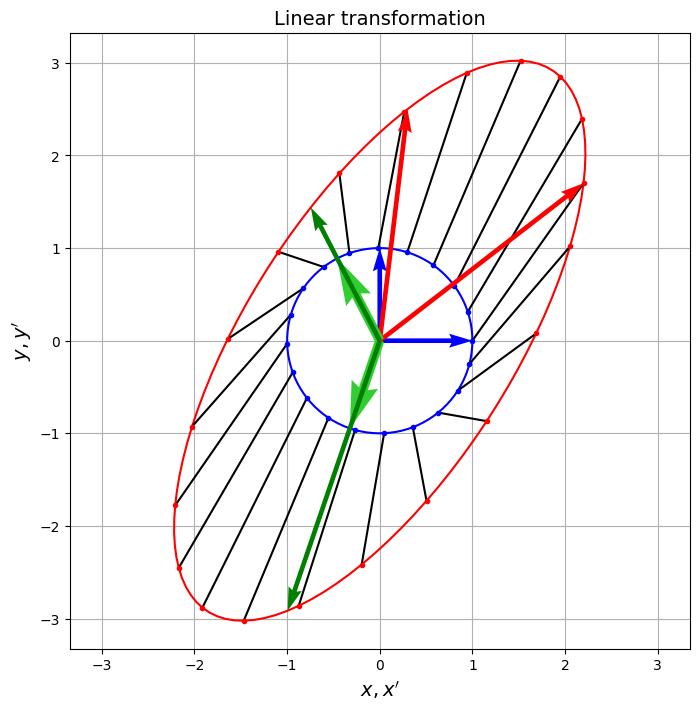

In [5]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)


# choose a random transformation matrix
# (not really we carefully selected one with real eigenvalues)
A = np.array([[2.2,0.3],[1.7,2.5]])
# we may also consider a symmetric matrix:
#A = np.array([[3, 1], [1,2]])

xp = A@x
yp = A@y
pointsp = A@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

# plot a subsect of vectors and how they transform
for i, angle in enumerate(theta[::5]):  # don't use all the angles
    #ax1.plot([0,points[0,5*i]],[0,points[1,5*i]],'k')
    ax1.plot([points[0,5*i],pointsp[0,5*i]],[points[1,5*i],pointsp[1,5*i]],'k')
    ax1.plot([points[0,5*i]],[points[1,5*i]],'b.')
    ax1.plot([pointsp[0,5*i]],[pointsp[1,5*i]],'r.')

# compute and plot some special directions!
lam, vecs = sl.eig(A)

# assert eigenvalues are real
np.testing.assert_allclose(np.imag(lam), 0, atol=1e-8)

# plot the unit eigenvectors
ax1.quiver(vecs[0,0], vecs[1,0], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)
ax1.quiver(vecs[0,1], vecs[1,1], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)

# plot the scaled eigenvectors
ax1.quiver(np.real(lam[0])*vecs[0,0], np.real(lam[0])*vecs[1,0], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)
ax1.quiver(np.real(lam[1])*vecs[0,1], np.real(lam[1])*vecs[1,1], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)

ax1.axis('equal');

The blue arrows are the original basis vectors, the red are what they transform to (the colums of $A$ here) - we've seen this sort of thing already. 


The blue dots show a subset of the points (at a finite resolution - `theta[::5]` in the code above "prunes" the number of points), showing how unit vectors or points on the initial unit circe map (in blue) map to new locations indicated by the red dots with black likes in between clarifying the correspondence.

Note how  the new locations/vectors now map out a (non-unit) ellipse (some stretching and rotation has gone on).

The green arrow indicate the *special* vectors/directions that do not change their orientation, only their magnitude. These are clearly the eigenvectors.

<br/>

Let's use matrix diagonalisation to break up this single transformation into three:



By noting that 

\begin{align*}
\underline{\mathbf A} = \underline{\mathbf P} \underline{\mathbf \Lambda} \underline{\mathbf P}^{-1} 
\end{align*}

where 

$$\underline{\mathbf P} = \left[ \; \boldsymbol{v}_1 \;\;  \boldsymbol{v}_2  \; \; \cdots \; \;  \boldsymbol{v}_n \; \right]$$

and 

$$\underline{\mathbf \Lambda} = \begin{pmatrix}
\lambda_1 & 0 &  \cdots & 0 \\
0 & \lambda_2 &  \ddots & 0\\
\vdots & &  \ddots  & \vdots \\
0 & \cdots & 0 & \lambda_n
\end{pmatrix}$$

let's break down the single matrix multiplication $A\boldsymbol{x}$ into three multiplications taken in turn:

\begin{align*}
\underline{\mathbf A}\boldsymbol{x} = \underline{\mathbf P} \underline{\mathbf \Lambda} \underline{\mathbf P}^{-1}\boldsymbol{x} = \underline{\mathbf P} \; (\underline{\mathbf \Lambda}\;  (\underline{\mathbf P}^{-1}\boldsymbol{x}))
\end{align*}

In [6]:
# it's eigenvalues and eigenvectors (calculated in the previous cell)
# (NOTE this uses the eigenvectors in a different order than in the example in Computational Mathematics)
lam1, lam2 = np.real(lam)
v1, v2 = vecs.T

# normalise the eigenvectors
v1 = v1/np.sqrt(np.dot(v1,v1))
v2 = v2/np.sqrt(np.dot(v2,v2))
               
# and stack them into the matrix P: 
# [v1, v2] gives matrix with v1 and v2 as rows
# so its tranpose produces P with v1 and v2 as columns
P = np.array([v1, v2]).T

# and form the diagonal matrix with e'vals on the main diagonal
Lambda = np.diag(np.array([lam1,lam2]))

# confirm our diagonalisation works
print('A =  P@Lambda@sl.inv(P) :', np.allclose(A, P@Lambda@sl.inv(P)))
print((P))
print(Lambda)
print(sl.inv(P))

A =  P@Lambda@sl.inv(P) : True
[[-0.459594 -0.322764]
 [ 0.888129 -0.946479]]
[[1.620274 0.      ]
 [0.       3.079726]]
[[-1.311545  0.447257]
 [-1.230688 -0.636864]]


First let's plot what the first multiplication

$$\underline{\mathbf P}^{-1}\boldsymbol{x}$$

does to the unit circle:

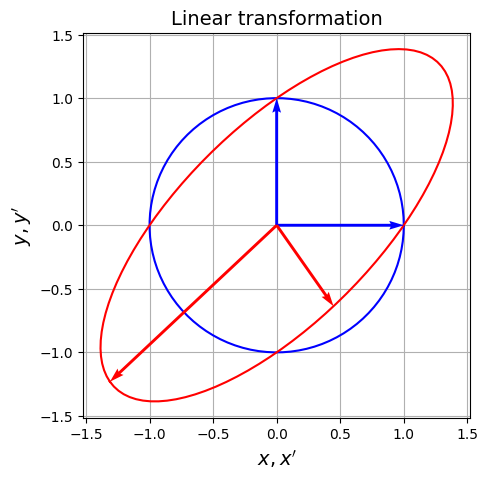

In [7]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)


# Use our P^{-1} matrix

xp = sl.inv(P)@x
yp = sl.inv(P)@y
pointsp = sl.inv(P)@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal');

From above $\underline{\mathbf P}^{-1}$ is

$$\begin{pmatrix}
-1.311545 & 0.447257 \\
-1.230688 & -0.636864
\end{pmatrix}$$

and so $(1,0)$ transform to $(-1.311544, -1.230688)$ and similarly for the second unit vector transforming to the second column of $\underline{\mathbf P}^{-1}$.

Note that in the case of a symmetric matrix $\underline{\mathbf A}$, $\underline{\mathbf P}$ is orthogonal and so this process we are mid way through here has a simpler interpretation - the $\underline{\mathbf P}$ and $\underline{\mathbf P}^{-1}$ matrices just perform rotations.

<br/>

Now let's pre-multiply by $\underline{\mathbf \Lambda}$:

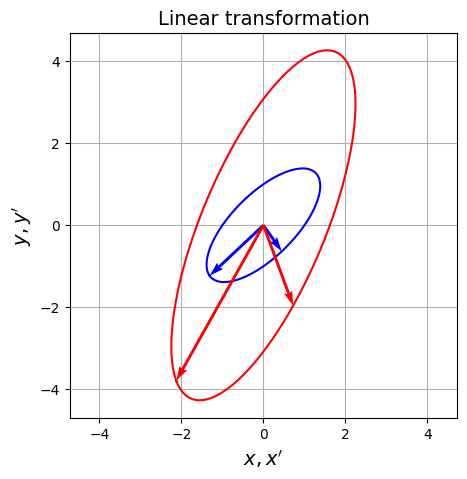

In [8]:
# before running this cell please make sure you run the previous

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# Use the points and the x,y from the previous cell:
x = xp
y = yp
points = pointsp

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# Now use our Lambda matrix

xp = Lambda@x
yp = Lambda@y
pointsp = Lambda@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal');

The blue here was the outcome of the first operation, the red the new result.

So pre-multiplication by the diagonal $\Lambda$ just stretches in the $x$ and $y$ directions.

<br/>

Finally we need to pre-multiply by $\underline{\mathbf P}$:

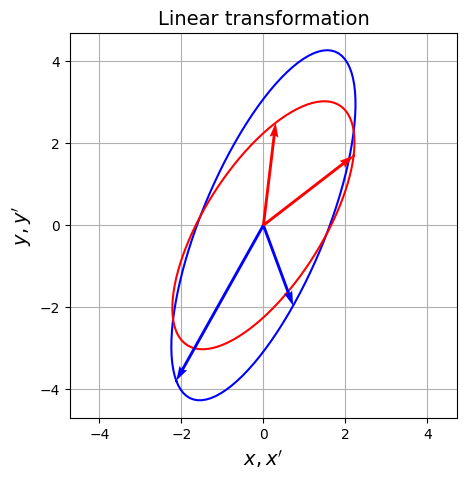

In [9]:
# before running this cell please make sure you run the previous

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

# Use the points and the x,y from the previous cell:
x = xp
y = yp
points = pointsp

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)

# Now use our P matrix

xp = P@x
yp = P@y
pointsp = P@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

ax1.axis('equal');

Again the blue was the output from the previous operations, and red the output from the final pre-multiplication.

Note that (as long as you run the three cells in order!) the red result here agrees with the transformation under the matrix $A$ that we plotted all in one go at the start.

<br/>

As mentioned above,in the case of a ***symmetric matrix*** the $\underline{\mathbf P}$ matrix is, or at least can be chosen to be, orthogonal. An orthogonal matrix represent a linear transformation that is simply a rotation, or a combination of a rotation and a reflection - in other words a transformation that preserves the length of all vectors. Indeed, if you repeat the previous cells for a symmetric matrix you can see that the first and third (final) steps are simply rotations, with the first using $\underline{\mathbf P}^{-1}$ being the opposite rotation of the third using $\underline{\mathbf P}$.

# Singular Value Decomposition (SVD)

Note that eigenvalues/vectors, and hence the eigen-decomposition of a matrix, are only defined for square matrices. 

The <a class="definition" href="#definitions" id="SingularValueDecompositionSVD">Singular Value Decomposition (SVD)</a> generalises the eigen-decomposition concept to non-square matrices.

Consider an arbitrary $m \times n$ real matrix $\underline{\mathbf A}$ - very similar to the square case it can be decomposed into a product of three matrices:

$$\underline{\mathbf A} = \underline{\mathbf U}\underline{\mathbf \Sigma} \underline{\mathbf V}^{T}$$

where


- $\underline{\mathbf U}$ is an $m\times m$ orthogonal matrix whose columns are the eigenvectors of the matrix $\underline{\mathbf A}\underline{\mathbf A}^T$,


- $\underline{\mathbf V}$ is an $n\times n$ orthogonal matrix whose columns are the eigenvectors of the matrix $\underline{\mathbf A}^T\underline{\mathbf A}$,


- $\underline{\mathbf \Sigma}$ is an $m\times n$ diagonal matrix whose diagonal entries, $\sigma_1, \sigma_2,\ldots  $ are the <a class="definition" href="#definitions" id="singularvalues">singular values</a> of $\underline{\mathbf A}$

The singular values of $A$ are positive, and the convention is to number them/place down the diagonal of $\underline{\mathbf \Sigma}$ in order of their magnitude: $\sigma_1\geq\sigma_2\geq\ldots\geq 0$.

The singular values are the square roots of the eigenvalues of the square matrix $\underline{\mathbf A}^T\underline{\mathbf A}$.  They are also the square roots of the eigenvalues of the square matrix $\underline{\mathbf A}\underline{\mathbf A}^T$.

$\DeclareMathOperator\rank{rank}$

But hang on .....  if $\underline{\mathbf A}$ is non-square then $\underline{\mathbf A}^T\underline{\mathbf A}$ and $\underline{\mathbf A}\underline{\mathbf A}^T$ are of different size and thus have different numbers of eigenvalues - how to reconcile this apparent contradiction? Remember that $\underline{\mathbf A}^T\underline{\mathbf A}$ and $\underline{\mathbf A}\underline{\mathbf A}^T$ have the same rank, namely the rank of $\underline{\mathbf A}$. The rank in a symmetric matrix is also equal to the number of nonzero eigenvalues. This follows from the fact that zero eigenvectors, are just null modes. From the rank-nullity theorem we know that a $n\times n$ matrix $\underline{\mathbf M}$ has $n-\rank(\underline{\mathbf M})$ independent zero eigenvectors, and thus if $\underline{\mathbf M}$ is symmetric and therefore has $n$ independent zero and non-zero eigenvectors, $\rank(\underline{\mathbf M})$ of these have to be nonzero.

Note that  we said we wanted an approach that worked when $\underline{\mathbf A}^T\underline{\mathbf A}$ or $\underline{\mathbf A}\underline{\mathbf A}^T$ are not invertible (equivalently have a zero eigenvalue - this is fine, the SVD handles arbitrarily many zero singular values as an extension of the previous comment on the "extra eigenvalues".)

<br/>

*(Figure: https://en.wikipedia.org/wiki/Singular_value_decomposition#/media/File:Singular_value_decomposition_visualisation.svg)*

<img src="./figures/SVD_visualisation.png" width="400x"/>



## Some SVD properties


- The rank of $\underline{\mathbf A}$ is $p$, where $p$ is the number of non-zero singular values.


 
- The first $p$ columns of $\underline{\mathbf U}$ form a basis for the range of $\underline{\mathbf A}$ (i.e. the span of the columns of $\underline{\mathbf A}$); the final $n-p$ columns of $\underline{\mathbf V}$ form a basis for the null space of $\underline{\mathbf A}$
 
 

- If $\underline{\mathbf A} = \underline{\mathbf A}^{T}$, then the singular values of $\underline{\mathbf A}$ are the absolute values of the eigenvalues of $\underline{\mathbf A}$ (the absolute values coming from squaring and taking the square root)


 
- The absolute value of the determinant of a square matrix $\underline{\mathbf A}$ is equal to the product of its singular values.



## Geometric interpretation

Above we showed that, via the eigendecomposition, we can interpret the action of matrix multiplication geometrically - by how it deforms a sphere (it turns it into a hyper-ellipse). 

In the ***square*** ***symmetric*** case the orthonormal eigenvectors describe rotations and the eigenvalues scalings.


<br/>

You can think of SVD as the generalisation of this - allowing us to geometrically understand the action of matrix multiplication for a non-square matrix (and a square but non-symmetric matrix) as a series of rotations (as $\underline{\mathbf U}$ and $\underline{\mathbf V}$ are orthogonal) and scalings:



*(Figure adapted from: https://en.wikipedia.org/wiki/Singular_value_decomposition#/media/File:Singular-Value-Decomposition.svg)*

<img src="./figures/Singular-Value-Decomposition.svg" width="400x"/>

"... the singular values of any $m \times n$ matrix can be viewed as the magnitude of the semiaxis of an $n$-dimensional ellipsoid in $m$-dimensional space, for example as an ellipse in a (tilted) 2D plane in a 3D space. Singular values encode magnitude of the semiaxis, while singular vectors encode direction. ..."


The size and shape of $\underline{\mathbf \Sigma}$, and the zeros that appear in the singular values, are responsible for the embeddings that occur as we map between spaces with different dimensions.

## The compact form of SVD

If both $\underline{\mathbf A}^T\underline{\mathbf A}$ and $\underline{\mathbf A}\underline{\mathbf A}^T$ are singular, then some of the singular values will be zero.  

Let us suppose that there are $p$ non-zero singular values.  

$\underline{\mathbf A}$ can then also be decomposed in a more compact (or reduced) form using only the eigenvectors that correspond to non-zero values:

$$\underline{\mathbf A} = \underline{\mathbf U}_p\underline{\mathbf \Sigma}_p \underline{\mathbf V}_p^{T}$$

where


- $\underline{\mathbf U}_p$ is an $m\times p$ orthogonal matrix whose columns are the eigenvectors of the matrix $\underline{\mathbf A}\underline{\mathbf A}^T$,


- $\underline{\mathbf V}_p$ is an $n\times p$ orthogonal matrix whose columns are the eigenvectors of the matrix $\underline{\mathbf A}^T\underline{\mathbf A}$,


- $\Sigma_p$ is an $p\times p$ diagonal matrix whose diagonal entries, $\sigma_1, \sigma_2, \ldots , \sigma_p>0$  are the non-zero *singular values* of $\underline{\mathbf A}$

<br/>

Here we just don't bother storing those entries which due to the zero singular values never contribute to the multiplication.

## Aside: some of the various uses of the SVD

1. This geometrical interpretation demonstrates how we can use the SVD to appreciate the most important direction of uncertainty/noise in observations - important in that they can have large or small impact on the model parameters we arrive at when doing inversion.  In  a very high dimensional system, if we wanted to perturb our model parameters (e.g. the initial state of the atmosphere in a weather forecast), then we can't afford to run lots of forecasts (termed an ensemble) where we fully explore the uncertainty, instead we might perturb the model parameters in the directions associated with the largest singular values. 
For more on this in the context of weather forecasting see: [Singular vectors in atmospheric sciences: A review](https://www.sciencedirect.com/science/article/pii/S0012825212000657)



2. The SVD is very important in related fields, e.g. see a description here of its importance in Machine Learning https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491



3. Since we can interpret an image in terms of a matrix, and a fun application of SVD is in image compression.  Notice first that expanding out the SVD:
$$\underline{\mathbf A} = \underline{\mathbf U}\underline{\mathbf \Sigma} \underline{\mathbf V}^{T} = \sigma_1 u_{:1} v_{:1}^T +  \sigma_2 u_{:2} v_{:2}^T + \ldots $$
since the $\sigma$'s are ordered in terms of their magnitudes, if we truncate this expansion early we get a so-called [low rank approximation](https://en.wikipedia.org/wiki/Low-rank_approximation) to the original matrix, or if we interpret the matrix as an image, we get different levels of compressed image! See a homework exercise and https://medium.com/@rameshputalapattu/jupyter-python-image-compression-and-svd-an-interactive-exploration-703c953e44f6


4. It is closely related to Principal Component Analysis some of you may have heard about https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca  and [A Tutorial on Principal Component Analysis](https://arxiv.org/pdf/1404.1100.pdf)


<br/><br/>


5. And finally, it is the basis for a type of inverse of use to us in this module:

# The generalised (or pseudo) Moore-Penrose inverse

## Definition

So we know that we have the compact form of the SVD for any matrix $A$:


$$\underline{\mathbf A} = \underline{\mathbf U}_p\underline{\mathbf \Sigma}_p \underline{\mathbf V}_p^{T}$$


The <a class="definition" href="#definitions" id="generalisedorpseudoorMoorePenroseinverse">generalised (or pseudo, or Moore-Penrose) inverse</a> of $A$, written $A^+$ is defined as


$$\underline{\mathbf A}^+ = \underline{\mathbf V}_p\underline{\mathbf \Sigma}_p^{-1} \underline{\mathbf U}_p^{T}$$


Note that $\underline{\mathbf \Sigma}_p$  is a diagonal matrix with non-zero entries on the diagonal, so that its inverse is easily generated simply by reciprocating each of its diagonal elements.  For $\underline{\mathbf U}$ and $\underline{\mathbf V}$ we have just transposed and swapped their order. Therefore forming this inverse once we have the (compact form of the) SVD is a triviality.


## Properties

The generalised inverse has the following properties all of which make it behave in ways that are similar to a true inverse: 


$$\begin{align*}
\underline{\mathbf A}\underline{\mathbf A}^+\underline{\mathbf A} &= \underline{\mathbf A}\\
\underline{\mathbf A}^+\underline{\mathbf A}\underline{\mathbf A}^+ &= \underline{\mathbf A}^+\\
(\underline{\mathbf A}^+\underline{\mathbf A})^T &= \underline{\mathbf A}^+\underline{\mathbf A}\\
(\underline{\mathbf A}\underline{\mathbf A}^+)^T &= \underline{\mathbf A}\underline{\mathbf A}^+\\
\end{align*}
$$

<br/>

Note that the generalised inverse defined above exists for any matrix other than the zero matrix, but when the matrix is of full rank, $\rank(\underline{\mathbf A})=\min(m,n)$, then it can be expressed via simple algebraic formulae that we've seen before!



- If $\underline{\mathbf A}$ is square and non-singular, then $\underline{\mathbf A}^+=\underline{\mathbf A}^{-1}$, so that it is the regular inverse of $\underline{\mathbf A}$. 



- If $\underline{\mathbf A}^T\underline{\mathbf A}$ is non-singular, then the generalised inverse defined above is equivalent to $\underline{\mathbf A}^+=(\underline{\mathbf A}^T\underline{\mathbf A})^{-1}\underline{\mathbf A}^T$, so that it is the least-squares inverse of $\underline{\mathbf A}$ (this is the "tall" over-determined case where the columns are linearly independent - the left inverse).



- If $\underline{\mathbf A}\underline{\mathbf A}^T$ is non-singular, then $\underline{\mathbf A}^+=\underline{\mathbf A}^T(\underline{\mathbf A}\underline{\mathbf A}^T)^{-1}$, so that it is the minimum-norm inverse of $\underline{\mathbf A}$ (this is the "fat" under-determine case, where the rows are linearly independent - the right inverse).


<br/>


$\underline{\mathbf A}^+$ always exists for any non-null (non-zero) matrix $\underline{\mathbf A}$ so that the generalised inverse solution $\boldsymbol{x}^+$ to the equation $A\boldsymbol{x} = \boldsymbol{b}$ also always exists and is given by  


$$\boldsymbol{x}^+ = \underline{\mathbf A}^+\boldsymbol{b}$$


It has the properties that


- If there is any model parameter vector that can provide an exact fit to the data $\boldsymbol{b}$, then $\boldsymbol{x}^+$  will be such a vector. 



- If there is no model parameter vector that can provide an exact fit to the data $\boldsymbol{b}$, then $\boldsymbol{x}^+$ will provide a best least-squares fit to the data.  


   
- If there is more than one exact or best-fitting parameter vector to the data $\boldsymbol{b}$, then $\boldsymbol{x}^+$ will be the exact or best-fitting model that also has the smallest norm. 


<br/>


Thus, we can apply the generalised inverse to provide a solution to ***any*** linear inverse, and we will get a result that has various sensible and desirable properties. 

In [10]:
A = np.array([
    [1,0,0],
    [1,0,0],
    [0,2,2],
    [0,3,3]])
b = np.array([1,2,2,3])

# note that numpy has a pseudoinverse function 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html

pinvA = np.linalg.pinv(A)

x = pinvA @ b

print(x)

print(A@x)


[1.5 0.5 0.5]
[1.5 1.5 2.  3. ]


## Practical Issues:

The generalised inverse however has some problems: 

* The generalised inverse is expensive to compute - the SVD calculation is expensive for large matrices and in practical terms it is impossible to use for many realistic (i.e. large) inverse problems.   

* Although  it  is  able  to  deal  with  zero-valued  singular  values  and  does  not  suffer  from problems when matrices are singular, it has no protection against very small singular values or very small eigenvalues that may be practically indistinguishable from zero when using finite-precision arithmetic.  

For real symmetric matrices, which have real eigenvalues, we call the ratio of the largest to the smallest eigenvalue the <a class="definition" href="#definitions" id="conditionnumber">condition number</a> and if the condition number is large we call it <a class="definition" href="#definitions" id="illconditioned">ill-conditioned</a>. As you will have seen in _Computational Mathematics_ (look back at lecture 4) if we have a small eigenvalue mode $\boldsymbol{v}$ with
$$\underline{\mathbf A} \boldsymbol{v}=\lambda\boldsymbol{v}$$
where $\lambda$ is small, this means that adding $v$ to a vector $\boldsymbol{x}$ will have a small impact on the matrix-vector product $\underline{\mathbf A}\boldsymbol{x}$. Reversely, if we change the right-hand side of our inverse problem
$$\underline{\mathbf A}\boldsymbol{x}=\boldsymbol{b}
\rightarrow
\underline{\mathbf A}\hat{\boldsymbol{x}} = \boldsymbol{b} + \boldsymbol{v}$$,
then because
$$\underline{\mathbf A}\left(\boldsymbol{x} + \frac 1{\lambda}\boldsymbol{v}\right)= \underline{\mathbf A}\boldsymbol{x} + \frac 1{\lambda} \underline{\mathbf A}\boldsymbol{\hat{v}}
= \boldsymbol{b}+\boldsymbol{v}$$,
so
$$
\hat{\boldsymbol{x}} = \boldsymbol{x} + \frac 1{\lambda}\boldsymbol{v}
$$
is the solution to our modified inverse problem. In other words if we add $\boldsymbol{v}$ to the desired outcome (right-hand side), we need to change the input with $1/\lambda$ times $\boldsymbol{v}$, which because $\lambda$ is small will be a very large change.

Using the SVD, we can now extend this analysis to singular values: if we have a small singular value $\sigma$ and their corresponding columns $\boldsymbol{v}$ in $\underline{\mathbf V}$ and $\boldsymbol{u}$ in $\underline{\mathbf U}$ (note these "modes" in the input and the output are now not necessarily the same!), then a change in the input with $\boldsymbol{v}$ leads to a change $\sigma\boldsymbol{u}$  in the outcome of the matrix-vector product, which is therefore small, and reversely a change $\boldsymbol{u}$ in the right-hand side requires a change $(1/\sigma)\boldsymbol{v}$ in the input. So you see the same problem of ill-conditioning arises for more general matrices, if we look at the ratio of smallest to largest singular values.

Such modes in the inputs of a model that have a small impact on the outputs, and are therefore poorly constrained in inverse problems are often referred to as <a class="definition" href="#definitions" id="noise">noise</a>. In a lot of practical inversion problems this corresponds exactly to what you might intuitively expect: say the input data represents some spatial variation, then often small-scale variations will have a small impact on the outcome of the model, because the physical process it represents is diffusive, or because we don't have enough resolution to represent small scale processes so the numerical model is artificially diffusive, or more generally because the outputs we are interested concern some "bigger picture" information we are trying to extract (e.g. we don't expect small scale noise in an input figure to affect the classification in a machine learning model).

As we will see in this module, for larger problems, say problems on a high resolution mesh, this issue of ill-conditioning becomes more prevalent, and therefore the generalized inverse approach is not very suited to solve these. As a final point:

* Most real inverse problems  are  non-linear,  and  the  generalised  inverse  only  solves  linear problems.  While the generalised inverse could be used within an iterative approach where a linearised version of the non-linear problem is solved at each iteration, it is likely to be overkill for that approach.  When we iterate to solve a non-linear problem, we generally do not need an exact, and hence expensive solution at each step; we just need a reasonable solution that improves the model, and then iteration will take care  of the rest.  In linearised inversion, the linear problem that we solve at each step is not the correct problem, it is just an approximation to it - consequently it is not sensible to spend huge effort to get an exact solution to what is only an approximation to the true problem.  

You'll see more on this in later lectures.

# Regularisation

If we have a mixed-determined problem for which the generalised inverse is not affordable, or for which small singular values and small eigenvalues lead to a noisy model, then we will need a different approach.  
Even in the case of a square problem with a non-singular matrix, it may still have a very small determinant and at least one very small eigenvalue.  In such a case, although the inverse may exist, the problem is unstable - large spurious values will likely appear in the solution. The solution  will  depend  upon  the  values  of  the  smallest  eigenvalues,  which  themselves  will likely  be  almost  entirely  related  to  the  noise  in  the  system.    Effectively,  in  any practical inversion problem, we face the issue of potentially dividing by small numbers that are noise dominated.

## Damped least squares

In <a class="definition" href="#definitions" id="dampedleastsquares">damped least-squares</a>, instead of minimising the objective function of the form

$$
f = \|\underline{\mathbf A}\boldsymbol{x} - \boldsymbol{b}\|_2^2
$$

instead we minimise the objective function

$$
f = \|\underline{\mathbf A}\boldsymbol{x} - \boldsymbol{b}\|_2^2 + \mu \|\boldsymbol{x}\|_2^2
$$

where $\mu$ is  a  positive  scalar  known  in  various  contexts  as  the  damping  factor,  trade-off, regularisation or pre-whitening parameter.

<br/>

Now when we invert, if you follow through the steps taken to derive least squares, the equation that we must solve takes the form 

$$ \boldsymbol{x} = (\underline{\mathbf A}^T\underline{\mathbf A} + \mu \underline{\mathbf I})^{-1} \underline{\mathbf A}^T \boldsymbol{b}$$

For a positive $\mu$, note that the matrix $(\underline{\mathbf A}^T\underline{\mathbf A} + \mu \underline{\mathbf I})$ is always non-singular and thus we are able to use this expression - it can be used to solve equi-, under-, over- and mixed-determined systems even if $\underline{\mathbf A}^T\underline{\mathbf A}$ and $\underline{\mathbf A}\underline{\mathbf A}^T$ are singular.

<br/>

By damping the least squares system, we have protected the solution against zero or small eigenvalues by adding a constant value, controlled by $\mu$, to the diagonal of $\underline{\mathbf A}^T\underline{\mathbf A}$. If $\mu$ is very small,  then  we  will  have something very close to  regular  least  squares (cf. the under-determined case above);  if  $\mu$  is  very  large, then  we  will  simply minimise the norm of the model parameters (the second term dominating the first).  Choosing the value of $\mu$ therefore involves a  trade-off between fitting the data and stabilising the result.  

We saw earlier that the minimal-norm inverse involved first finding an exact or best least-squares fit to the data, then, subject to that constraint, finding the solution that minimised the $L^2$-norm of the model/solution vector.
Damped  least-squares  does  something  similar,  except  here  the parameter $\mu$ is adjusted to control the degree to which the solution fits the data (which is favoured by decreasing the value of $\mu$), and the degree to which it  minimises  the  norm  of  the  model (which is favoured by increasing the value of $\mu$). Recall that in practice a problem may well be formulated such that it is the perturbation to an *a priori* model rather than the model itself that is minimised. 

The key idea here is to set the value of $\mu$ so that it removes the influence of small eigenvalues in $\underline{\mathbf A}^T\underline{\mathbf A}$ from the problem, but leaves the larger eigenvalues alone.  The larger eigenvalues then control the fit to the data (the smaller eigenvalues would contribute almost nothing to this  fit  anyway  because  they  are  small),  and  the  resulting  under-determined model is then fully determined by minimising its norm.   

Including only  the  largest  eigenvalues  in  the  solution  will effectively  reduce  the  resolution  of  the recovered  model  parameters,  whereas  including  the  smaller  eigenvalues  will  increase  the noise  within  the  recovered  model  parameters.    We  are  therefore  trading  resolution  against noise in the model, and the value of $\mu$ controls that trade-off.  Yet another way to regard $\mu$ is that we should choose it so that the fit to the data is only as good as is required by the level of noise in the data, but no better.  If we insist on lowering $\mu$ beyond this, then we will be **over-fitting** the data - the increased apparent match to the observed data will then merely serve to map noise from the data into the model without additional benefit to the model. 

In practice, it can be difficult to choose $\mu$ to achieve these outcomes.  One way to do this, at least in principle, is to invert the data using a range of values for $\mu$, and then plot the model norm against the data-residual norm as in 

<img src="./figures/trade_off_curve.png" width="400x"/>


If we are lucky, there may be a corner or elbow in this plot that indicates a clear break and an optimal value for $\mu$; in many problems though no obvious  corner  appears.   If  we  know  the  data  errors,  then  we  can  compute  the  minimum useful value of the data-residual norm, and select a value of $\mu$ that is consistent with this.



## More general regularisation

Use of damped least-squares assumes implicitly that we know something about the model parameters that is independent  of  the data - that is we know it *a  priori*, before we undertake the experiment or observations that generate the data.  
In this case, our *a priori* knowledge is simply that the model should have a smal  norm, ideally zero.    
This assumption is most appropriate when, in the absence of data, we would assume that the model was zero - typically this will be the case when the model for which we are inverting is the perturbation to some best-guess starting model.

However, assuming a minimum-norm is not the only a priori assumption we can make. 
We might instead assume for example that the norm of the first or second  derivatives of the model parameters should be small.   
The first of these is the assumption that the model is  "flat" - all the model parameters are the same - and the second is the assumption that the model is "smooth" - the variation between adjacent parameters is everywhere the same.   

These assumptions, and the assumption of minimal model norm as made in the damped least-squares approach, are all forms of <a class="definition" href="#definitions" id="modelregularisation">model regularisation</a>. Regularisation in general refers to the process of introducing additional a priori information about the properties of the model in order to solve ill-posed problems without over-fitting the data and without introducing noise, instability and spurious structure into the resultant model. 

Many regularisation schemes can be implemented by minimising an objective function of the form 

$$
f = \|\underline{\mathbf A}\boldsymbol{x} - \boldsymbol{b}\|_2^2 + \mu \|\underline{\mathbf L}\boldsymbol{x}\|_2^2,
$$

where $L$ is a matrix that acts on $\boldsymbol{x}$ to generate the property that we seek to minimise. 
This is often refered to as <a class="definition" href="#definitions" id="Tikhonovregularisation">Tikhonov regularisation</a>
For damped least-squares, $\underline{\mathbf L}$ is simply the identity matrix $\underline{\mathbf I}$, and this is sometimes called zero-order
 Tikhonov regularisation, and minimising the norms of the first and second differentials of the model are called first and second-order Tikhonov regularisation. For the latter two we choose $\underline{\mathbf L}$ to be an operator that acts like/approximates a first or second order derivative respectively. This might for instance be the discretised differential operator in a numerical model.

# List of Definitions
<a id="definitions"/>

* <a class=definition href="#orthogonalororthonormalmatrix">orthogonal (or orthonormal) matrix</a>
* <a class=definition href="#SingularValueDecompositionSVD">Singular Value Decomposition (SVD)</a>
* <a class=definition href="#singularvalues">singular values</a>
* <a class=definition href="#generalisedorpseudoorMoorePenroseinverse">generalised (or pseudo, or Moore-Penrose) inverse</a>
* <a class=definition href="#conditionnumber">condition number</a>
* <a class=definition href="#illconditioned">ill-conditioned</a>
* <a class=definition href="#noise">noise</a>
* <a class=definition href="#dampedleastsquares">damped least-squares</a>
* <a class=definition href="#modelregularisation">model regularisation</a>
* <a class=definition href="#Tikhonovregularisation">Tikhonov regularisation</a>
